# On-Policy Montecarlo Control

In [2]:
#With On policy omtecarlo control we are trying to maximize the rewards subject to a function. We are trying to optimize the policy.
#On-policy methods basically run the episode with a random policy, improve it and the evalue the policy again
#Is very similar to policy iteration algorithm


import torch
import gym
from collections import defaultdict
env=gym.make('Blackjack-v0')

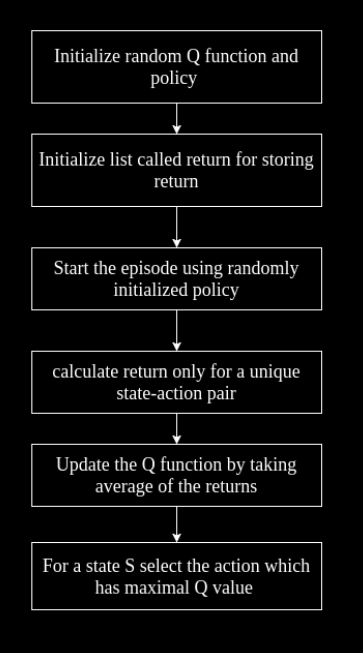

# STEP 1: Run Episode

In [25]:
def run_episode(env,Q,n_action):
    state=env.reset()
    rewards=[]
    actions=[]
    states=[]
    is_done=False
    #2.This generates a random number between 0-1 and extraxts the number with .item()
    action=torch.randint(0, n_action,[1]).item()
    while not is_done:
    #3.It append the action to the list of actions    
        actions.append(action)
    #4.As well as the states    
        states.append(state)
    #5.Takes an action until the condition that brakes the loop is broken.    
        state, reward, is_done, info=env.step(action)
        rewards.append(reward)
        if is_done:
            break
    #6.The next action the agent takes depends of the Best Value of the Q Function at that state Q(0,s)=[Q(0,0) , [Q(0,1)]]  
    #7. Q is a dictionary that has a function insde. When I say Q[1] then it creates key '1' and initiaties a random tensor as an item fx: Q={'1':tensor([xxxxx,xxxxx])}
    #8. As I go through the Loop of states it adds more so if the next state was 21 --->Q{'1':tensor([xxxxx,xxxxx]),'21':tensor([xxxx,xxxxx])}
        action=torch.argmax(Q[state]).item()
    #7.The results are a set of actions    
    return states, actions,rewards

# STEP 2: ON-Policy MC Control

In [29]:
def mc_control_on_policy(env,gamma,n_episode):
    n_action=env.action_space.n
    G_sum=defaultdict(float)
    N=defaultdict(int)
    #3.torch.empty(env.action_space.n) creates and 1x2 tensor(fx: tensor([6.8664e-44, 1.3032e-43]))
    #4.A Lambda function is an anonimos function that has no argument (lambda x: x + 1)(2) = lambda 2: 2 + 1  =3
    #5.In this case Q is a dictionairy of functions. When I call Q.keys() its going to give me lamda. When I call items() is goin to give me the tensor
    #6.defaultdict is special function because it creates a ditionary out of anything and does not throw an error.
    Q=defaultdict(lambda:torch.empty(env.action_space.n))
    for episode in range(n_episode):
        states_t,actions_t,rewards_t=run_episode(env,Q,n_action)
        return_t=0
    #7.In this case G is an empty dictrionayry
        G={}
    #8.With that simulated states and rewards we calculate the return just as in the Policy Evaluation - Every State
        for state_t,actions_t,reward_t in zip(states_t[::-1],actions_t[::-1],rewards_t[::-1]):
    #9.Calculate Return for every state and simply add the value in G and simply calculate the average for every state 
            return_t=reward_t+gamma*return_t
    #10.Creates a dictionary key with the state and the action and assigns the return    
            G[(state_t,actions_t)]=return_t
    #11. when the G dictionary it loops over the keys(state_action) and items(return_t) 
        for state_action,return_t in G.items():
    #12.Unpacks the Tupple (state_action)
            state,action=state_action
            if state[0]<=21:
    #13.I am creating the Key State_action and adding the return, if It existed before is going to added again        
                G_sum[state_action]+=return_t
    #14.Adds the number of times that has happeded     
                N[state_action]+=1
    #15.Here it updates the Value of Q(s,a)=Q[state=1,2,3,4,5....21, action=0,1]    
                Q[state][action]=G_sum[state_action]/N[state_action]
    policy={}
    #16.This last times it calculates the maximum values
    for state, actions in Q.items():
        policy[state]=torch.argmax(actions).item()
    return Q, policy

In [30]:
gamma=1
n_episode=1000

In [32]:
optimal_Q,optimal_policy=mc_control_on_policy(env,gamma,n_episode)
print(optimal_Q)

defaultdict(<function mc_control_on_policy.<locals>.<lambda> at 0x7f5cb35c3c10>, {(16, 10, False): tensor([-0.6364, -0.6296]), (21, 10, False): tensor([9.0000e-01, 4.5689e-41]), (15, 10, False): tensor([-0.5833, -1.0000]), (8, 10, False): tensor([-1.0000, -0.7500]), (16, 5, False): tensor([-1.0000, -0.6667]), (13, 5, False): tensor([-0.1429, -1.0000]), (12, 5, False): tensor([-0.3333, -1.0000]), (17, 10, False): tensor([-0.6667, -0.5500]), (11, 10, False): tensor([-0.6000,  0.2222]), (12, 10, False): tensor([-0.6000, -0.6842]), (21, 10, True): tensor([ 0.6667, -0.7143]), (13, 1, False): tensor([-0.4286, -0.7778]), (12, 1, False): tensor([-1.0000, -0.3333]), (19, 8, False): tensor([ 0.7778, -0.6667]), (20, 10, False): tensor([ 0.5714, -1.0000]), (17, 2, False): tensor([ 0.3333, -0.7500]), (18, 8, False): tensor([ 0.1667, -1.0000]), (14, 10, True): tensor([-1., -1.]), (16, 6, False): tensor([ 0.5000, -1.0000]), (21, 6, False): tensor([8.0000e-01, 4.5689e-41]), (19, 6, False): tensor([ 1.

In [16]:
Q=defaultdict(lambda:torch.empty(env.action_space.n))


In [10]:
Q[3]

tensor([5.2831e+09, 3.0910e-41])

In [11]:
print(Q)

defaultdict(<function <lambda> at 0x7f5cb361fa60>, {3: tensor([5.2831e+09, 3.0910e-41])})


In [15]:
Q[5]

tensor([3.2692e+11, 4.5689e-41])

In [17]:
print(Q)

defaultdict(<function <lambda> at 0x7f5cb361faf0>, {})


In [18]:
Q[1][2]=2

IndexError: index 2 is out of bounds for dimension 0 with size 2